In [1]:
from datetime import datetime as dt
time_start = dt.today()

import pandas as pd
#import main_module
%run main_module.ipynb

#import PyQt5 # для графиков в отдельных картинках
#%matplotlib qt  

%matplotlib inline

In [2]:
# Перевод сигнала из файла .prs в рабочей директрории ASTRO в файл sig.txt
#!del "sig.txt"
#!HardDecoder.exe "C:\HOLTWIN_mian\RWORK\DATA\c0000001.prs" sig.txt 

## Чтение и подготовка

In [3]:
#type_h = 'HE12BP'
type_h = 'HE12N'

testing_record = record(r"sig_12.txt", holter_type=type_h, amplitude_convert = 330)

croped: 1200000


len: 1200000


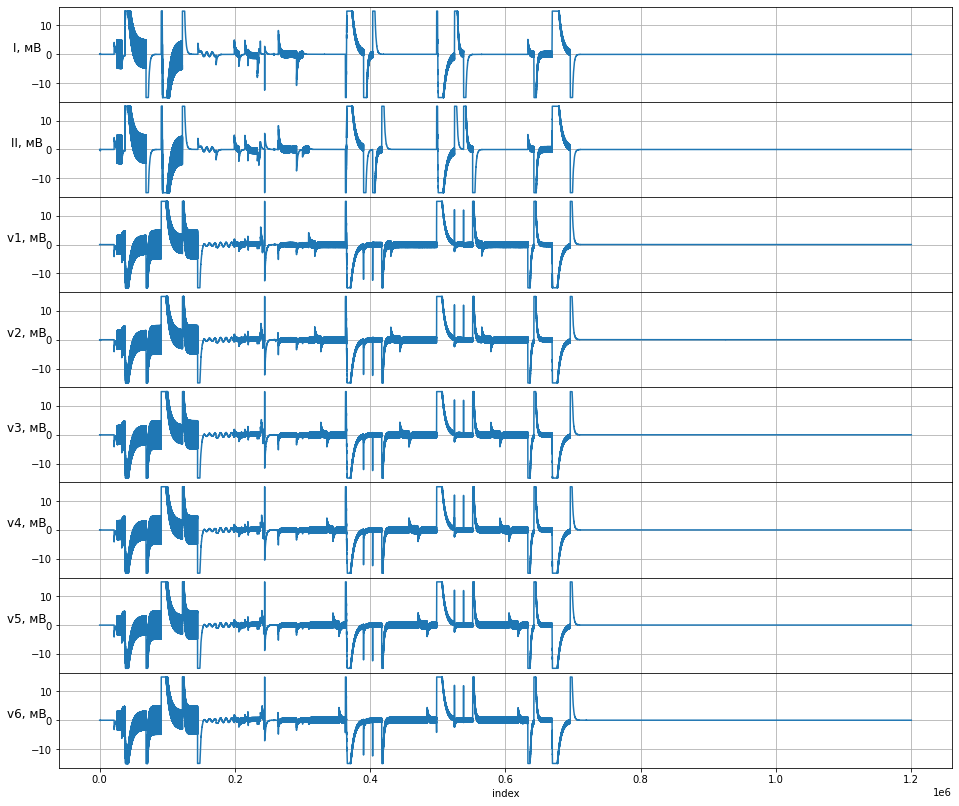

In [4]:
testing_record.plot()

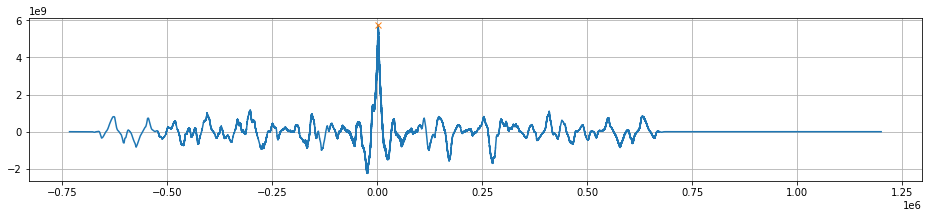

index lag: 2137


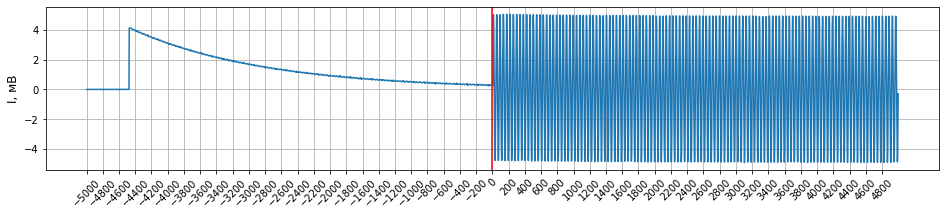

In [5]:
testing_record.find_index_lag(offset=200, plot_corr=True)
print('index lag:' ,testing_record.index_lag)
testing_record.calibrate_index_lag()
testing_record.split_channels()

In [6]:
# testing_record.plot_segment(n_seg=35, border=0.0)

In [7]:
# # Построение участков
# i_seg = 3
# border = 0.2

# begin = testing_record.time_limits[i_seg][1] + testing_record.index_lag
# end = testing_record.time_limits[i_seg][2] + testing_record.index_lag
# print('Segment:' ,testing_record.time_limits[i_seg][0])
# testing_record.find_segment_limits(begin, end, border)

## Тесты

In [8]:
tests_rezult_pd = pd.DataFrame(columns=['Test_name','Passed_test' ,'Returned_values', 'Spikes'])

Максимальный размах записи:    0.027 мВ
Максимально допустимый размах: 0.02 мВ
[0.012, 0.012, 0.021, 0.024, 0.021, 0.027, 0.015, 0.013]


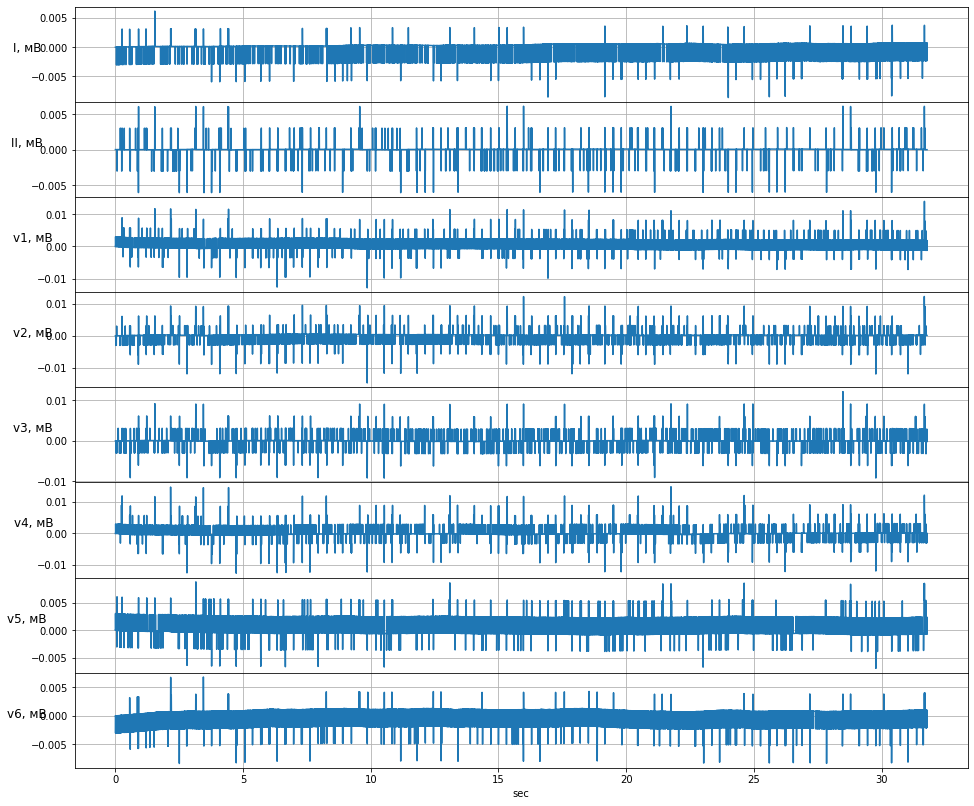

In [9]:
# Шум
values = nose_test(testing_record, max_nose = 0.02, filtred=True)
tests_rezult_pd.loc[0] = [ 'Nose test', max(values)<0.02  , values, pd.NA ]

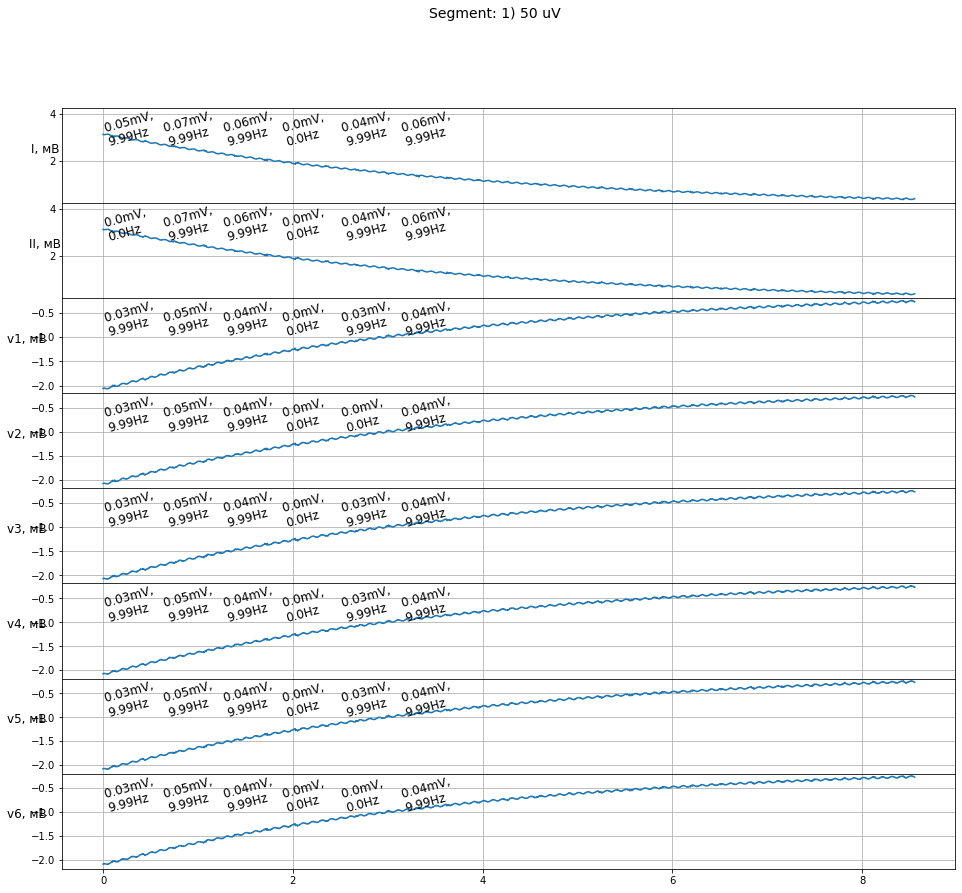

[0.06, 0.06, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]


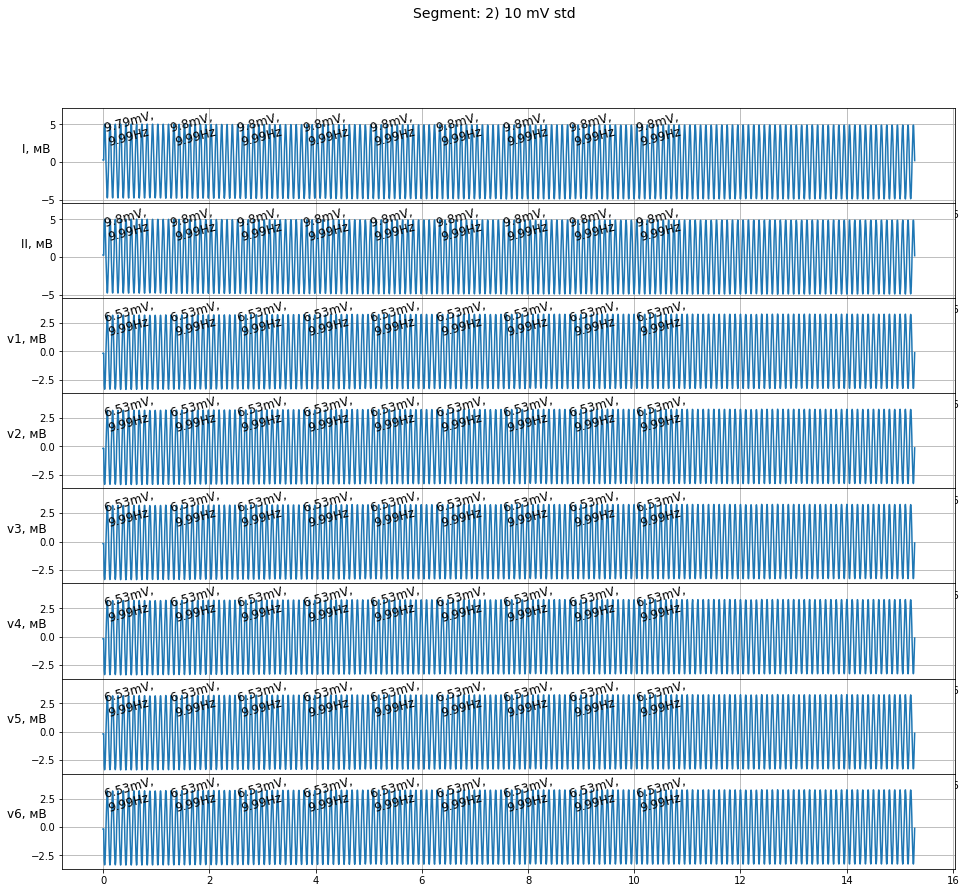

[9.8, 9.8, 6.53, 6.53, 6.53, 6.53, 6.53, 6.53]


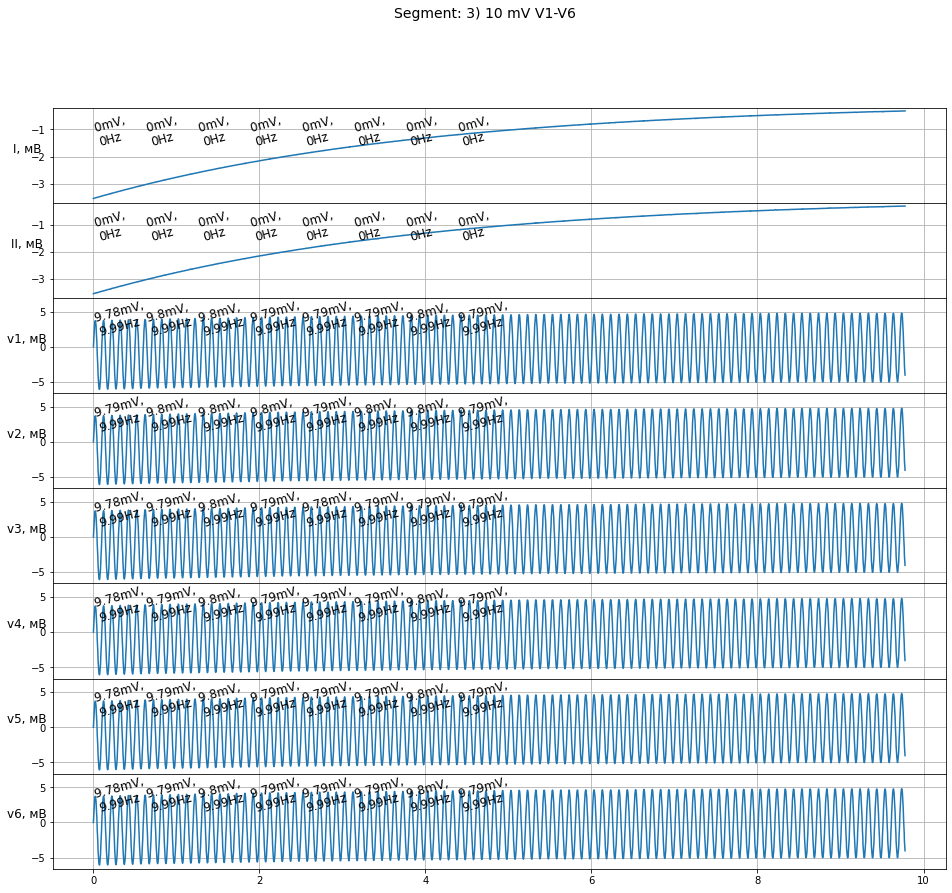

[0.0, 0.0, 9.79, 9.8, 9.79, 9.79, 9.79, 9.79]


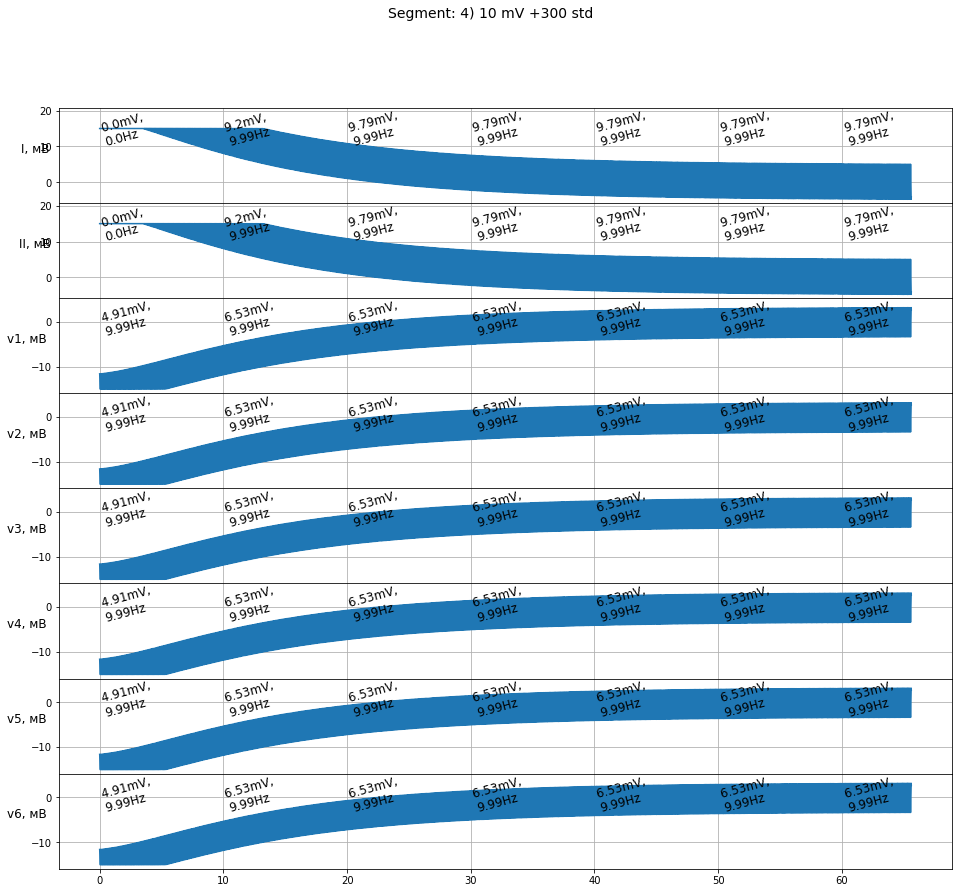

[9.79, 9.79, 6.53, 6.53, 6.53, 6.53, 6.53, 6.53]


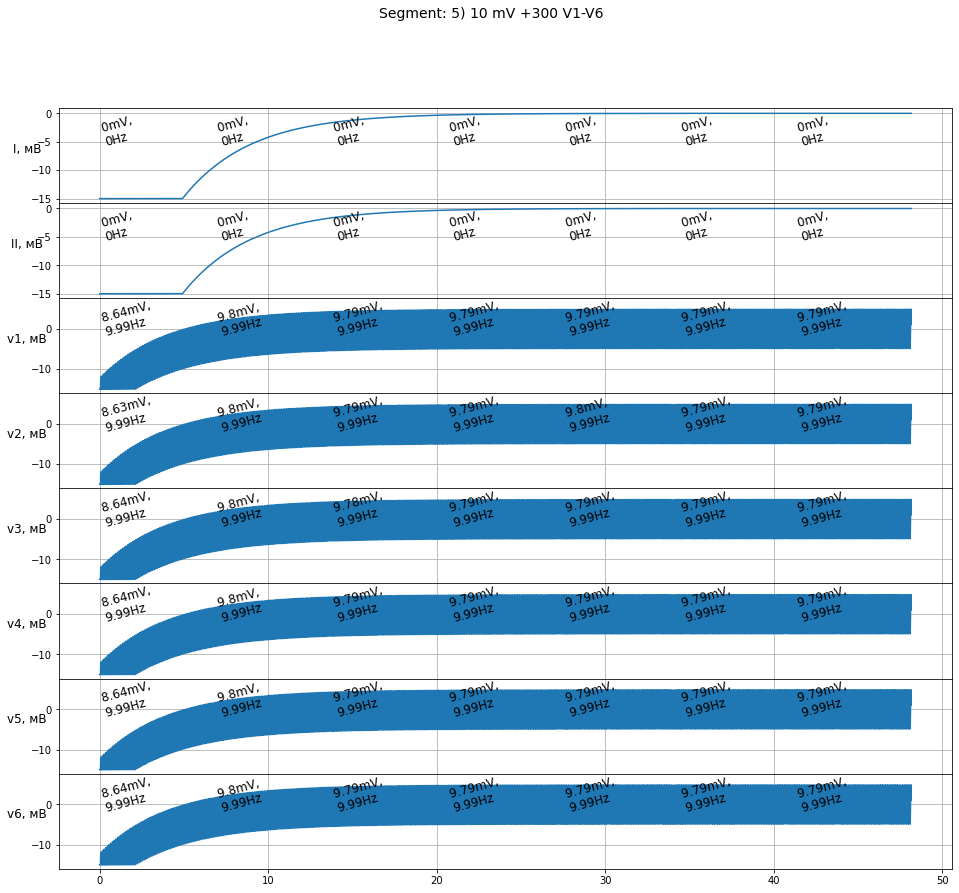

[0.0, 0.0, 9.79, 9.79, 9.79, 9.79, 9.79, 9.79]


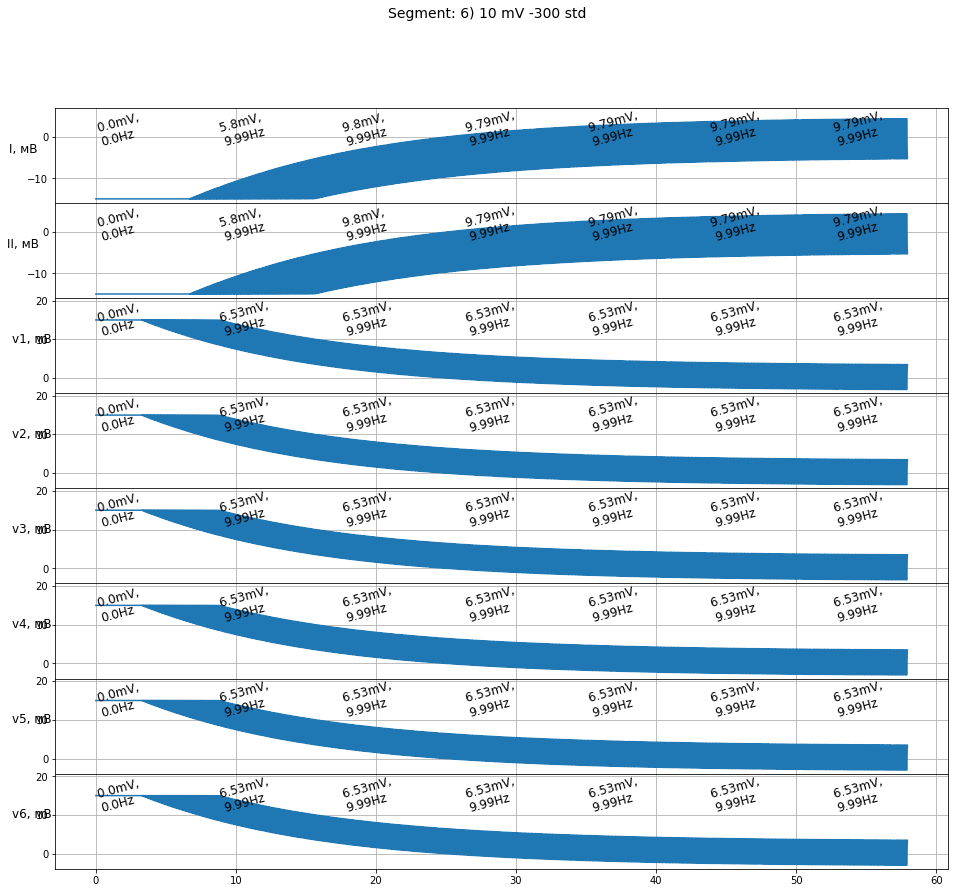

[9.79, 9.79, 6.53, 6.53, 6.53, 6.53, 6.53, 6.53]


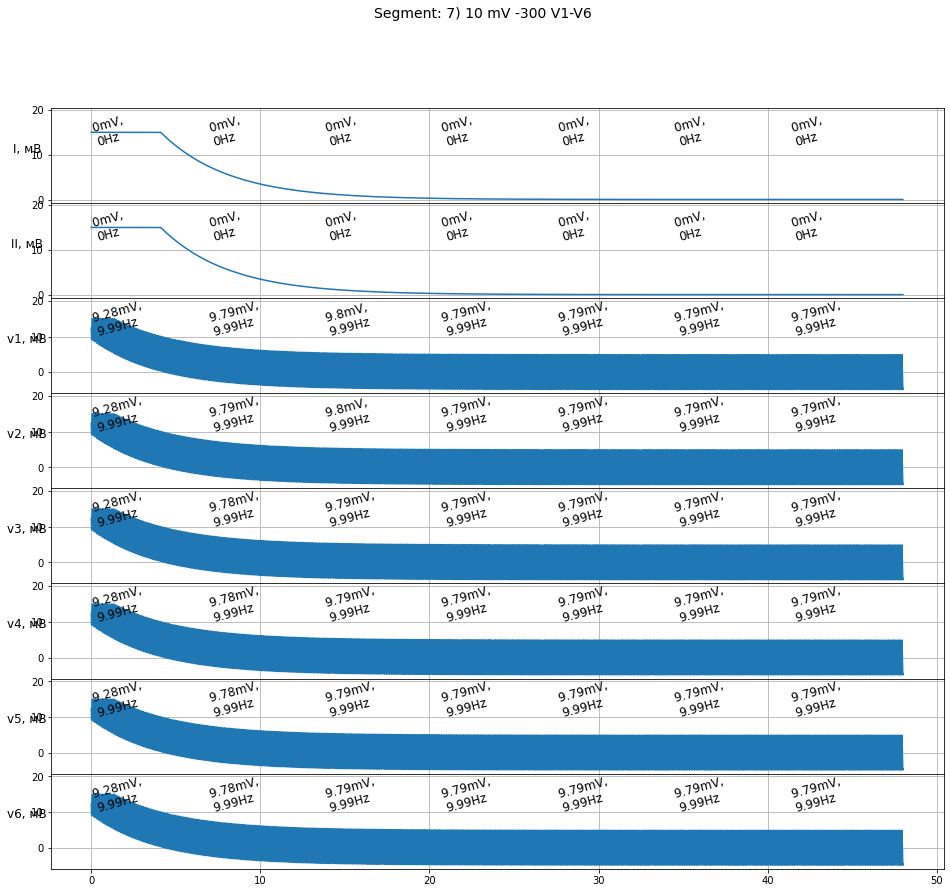

[0.0, 0.0, 9.79, 9.79, 9.79, 9.79, 9.79, 9.79]


In [10]:
# Амплитуды
values, spikes =  amplitude_test(testing_record, n_seg = 1, peaks_height= 0.03, check_spike=False)
passed_test = min(values) > 0
tests_rezult_pd.loc[1] = [ 'Amp test 50 uV', passed_test  , values, pd.NA]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 2)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 3)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[2] = [ 'Amp test 10 mV', passed_test  , values, spikes]

#------
values_std, spikes_std = amplitude_test(testing_record, n_seg = 4)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 5)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[3] = [ 'Amp test 10 mV +300 mV', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 6)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 7)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[4] = [ 'Amp test 10 mV -300 mV', passed_test  , values, spikes]


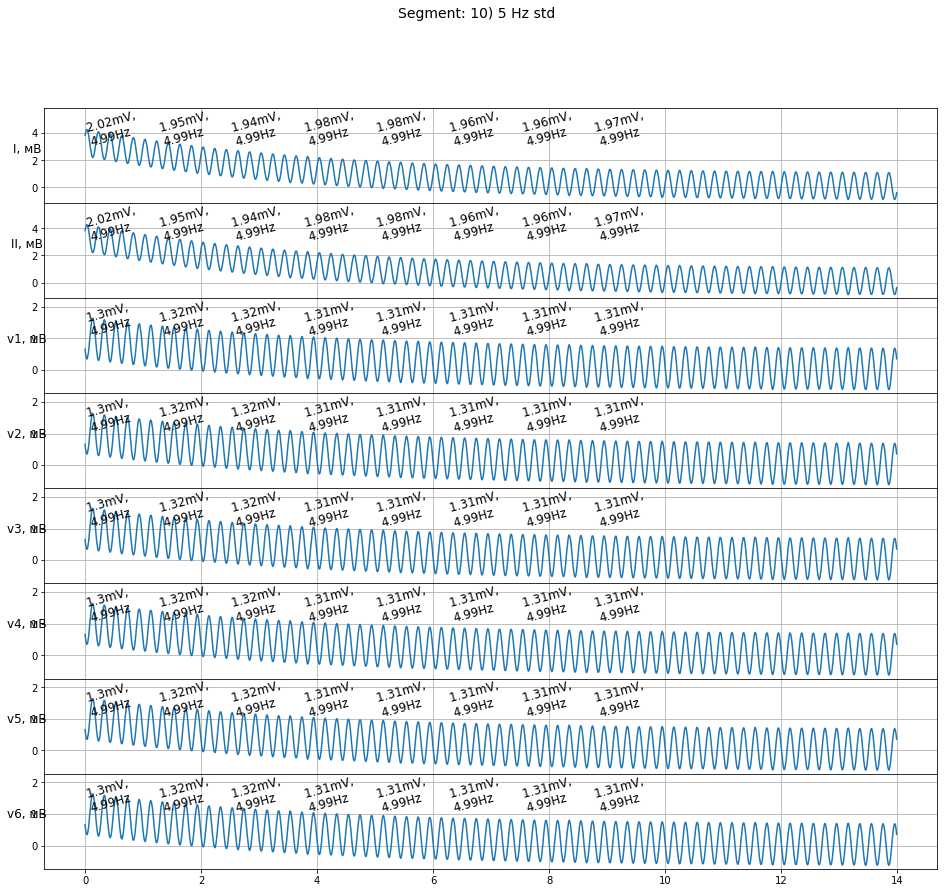

[1.96, 1.96, 1.31, 1.31, 1.31, 1.31, 1.31, 1.31]


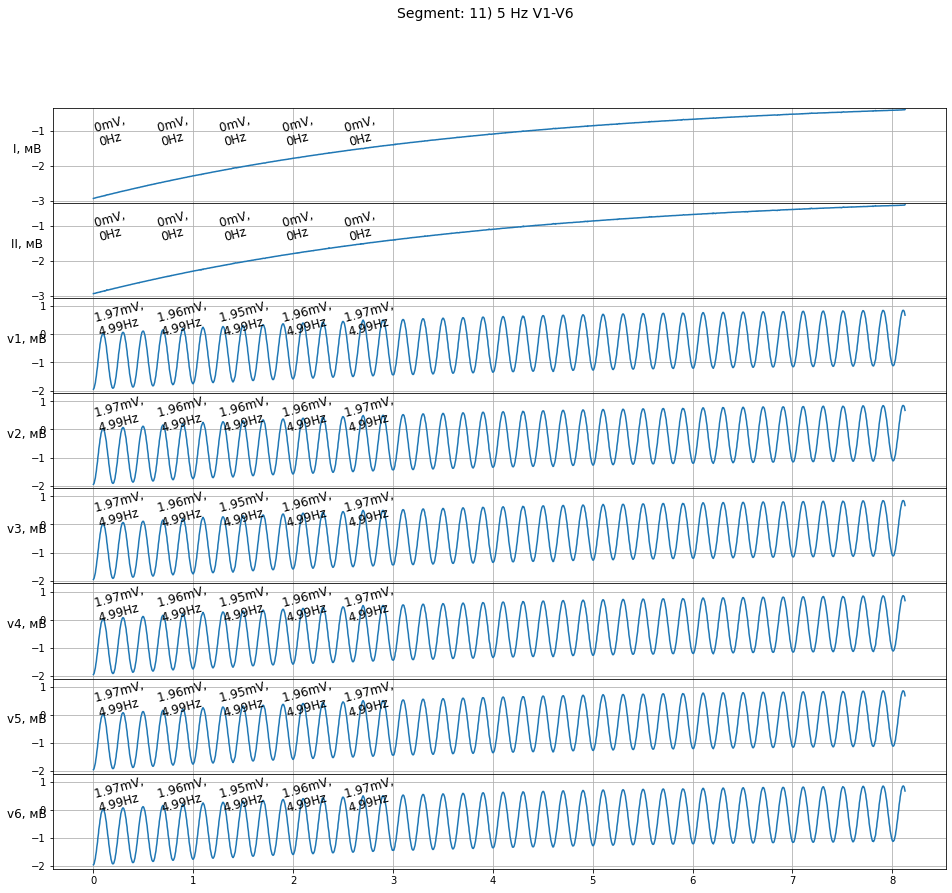

[0.0, 0.0, 1.96, 1.96, 1.96, 1.96, 1.96, 1.96]


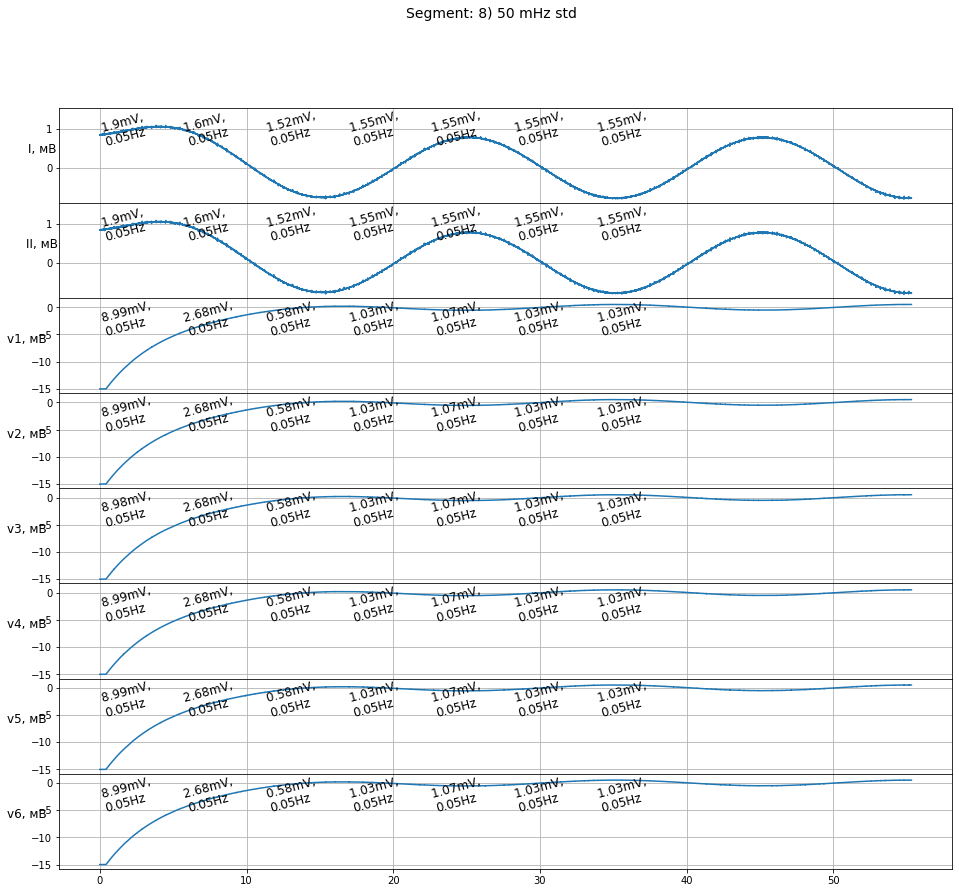

[1.55, 1.55, 1.03, 1.03, 1.03, 1.03, 1.03, 1.03]


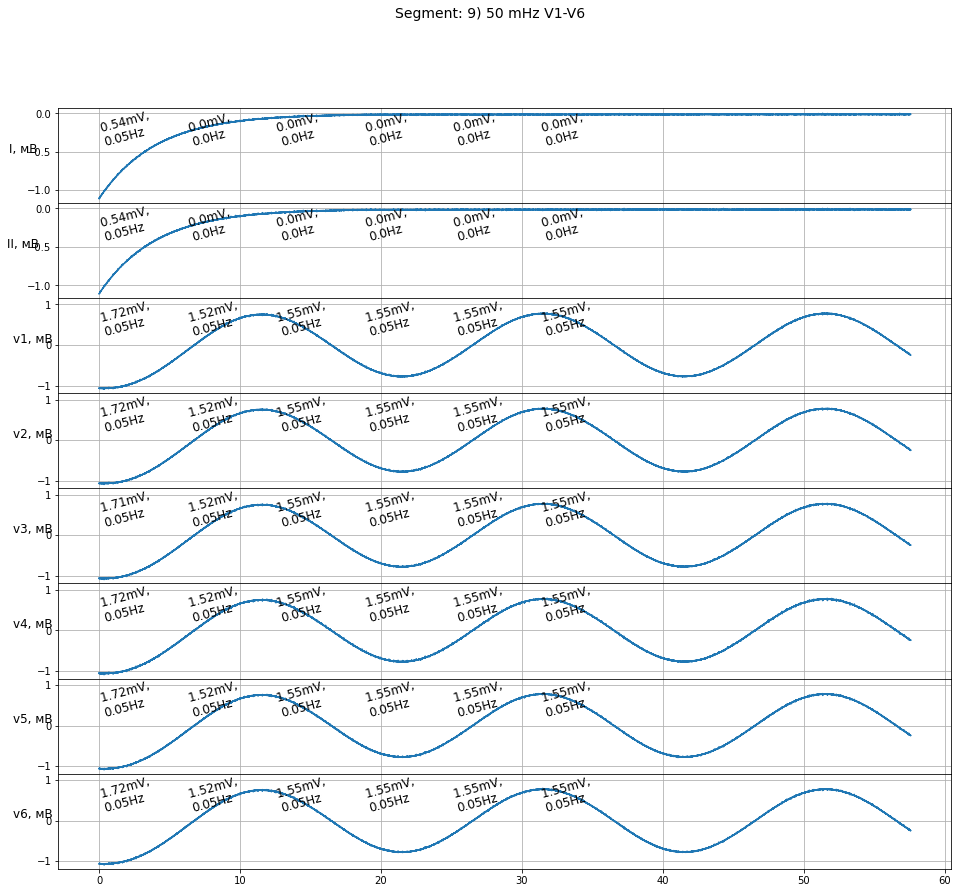

[0.0, 0.0, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55]


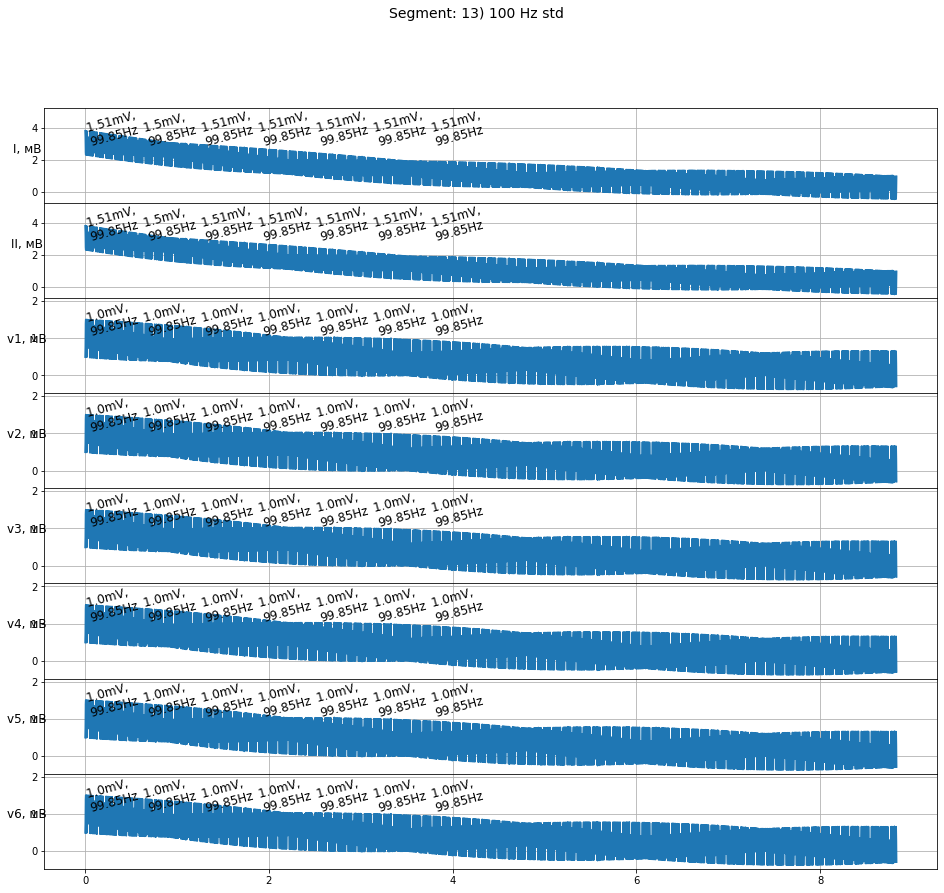

[1.51, 1.51, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


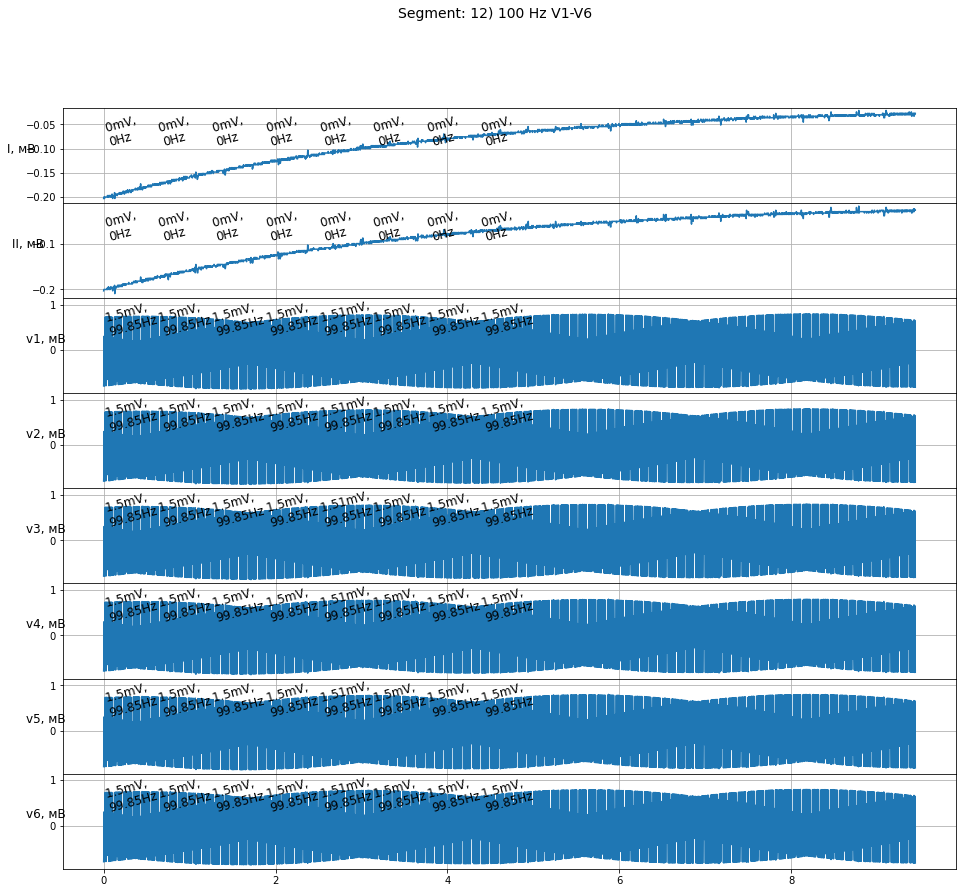

[0.0, 0.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]


In [11]:
# Частоты
values_std, spikes_std = amplitude_test(testing_record, n_seg = 10)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 11)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 2)< 2*0.05)==1
tests_rezult_pd.loc[5] = [ 'frequency response 5 Hz', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 8, window_size = 2**13)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 9, window_size = 2**13)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[5][2])*0.7)==1
tests_rezult_pd.loc[6] = [ 'frequency response 50 mHz', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 13, check_spike=False)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 12, check_spike=False)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[5][2])*0.7)==1
tests_rezult_pd.loc[7] = [ 'frequency response 100 Hz', passed_test  , values, pd.NA]


I, max = 1.007 sec, min = 1.0 sec
II, max = 1.007 sec, min = 1.0 sec
v1, max = 1.007 sec, min = 1.0 sec
v2, max = 1.007 sec, min = 1.0 sec
v3, max = 1.007 sec, min = 1.0 sec
v4, max = 1.007 sec, min = 1.0 sec
v5, max = 1.007 sec, min = 1.0 sec
v6, max = 1.007 sec, min = 1.0 sec
Прохождение испытания: True


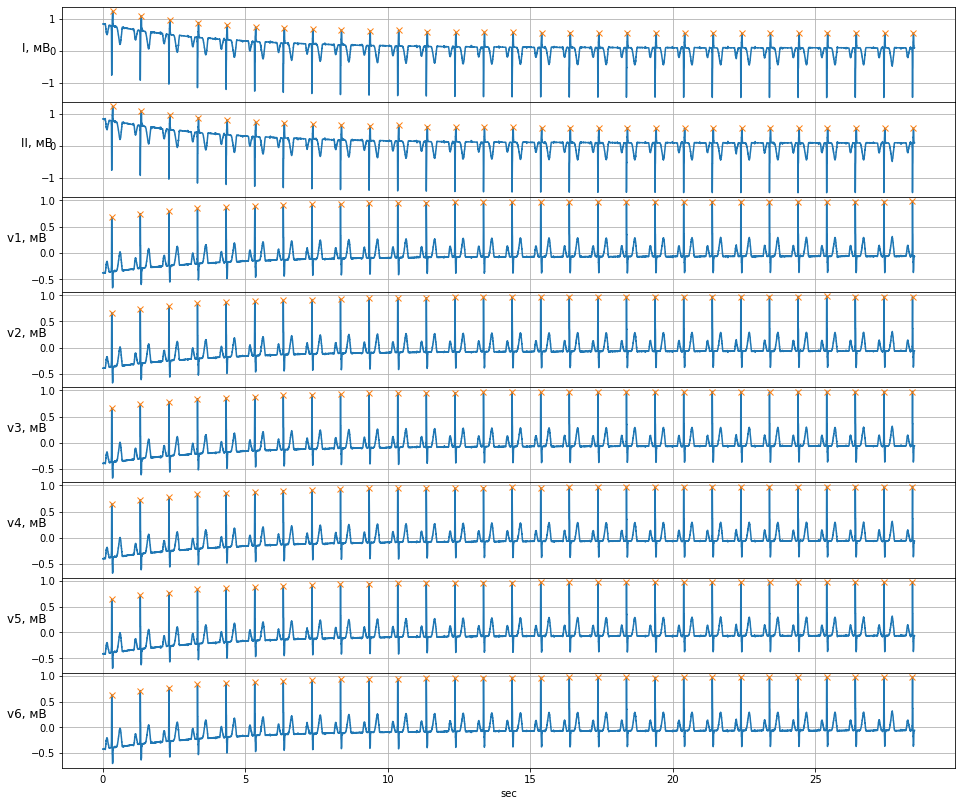

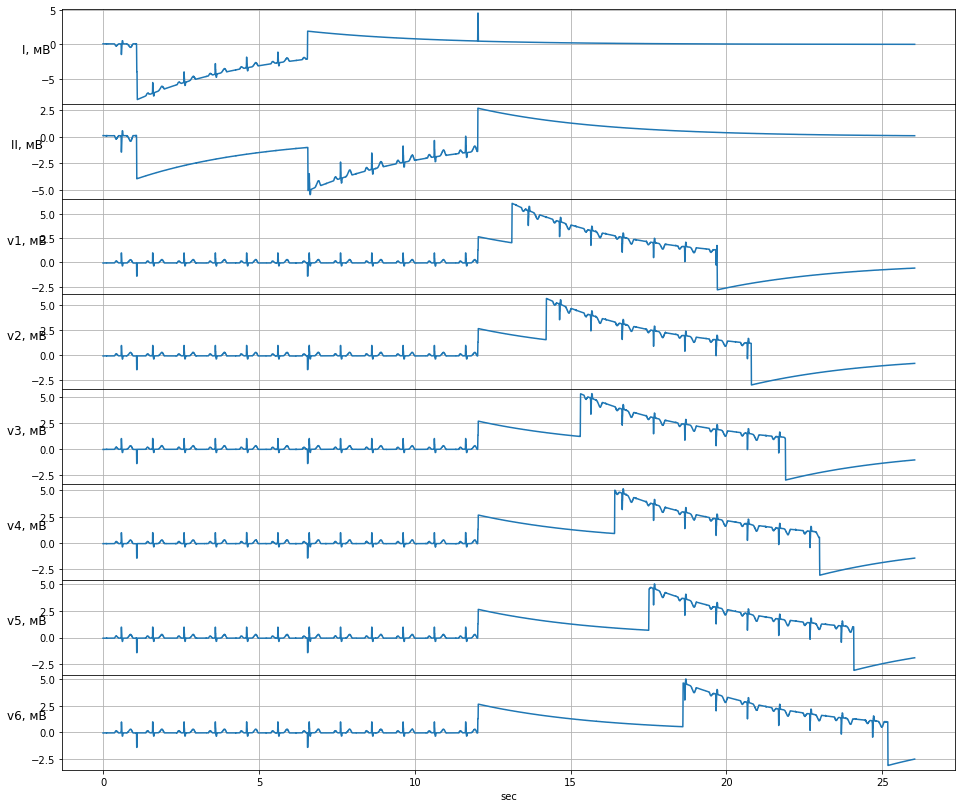

In [12]:
# ЭКГ/время
passed_test = ECG_test(testing_record, n_seg = 14)
tests_rezult_pd.loc[8] = [ 'ECG test', passed_test  , pd.NA, pd.NA]

Segment: 16) Доп. ток
I, max = 0.29 мВ, min = -0.25 мВ
II, max = 0.3 мВ, min = -0.15 мВ
v1, max = 0.1 мВ, min = -0.18 мВ
v2, max = 0.1 мВ, min = -0.64 мВ
v3, max = 0.1 мВ, min = -0.15 мВ
v4, max = 0.12 мВ, min = -0.15 мВ
v5, max = 0.1 мВ, min = -0.15 мВ
v6, max = 0.1 мВ, min = -1.02 мВ
Прохождение испытания: False


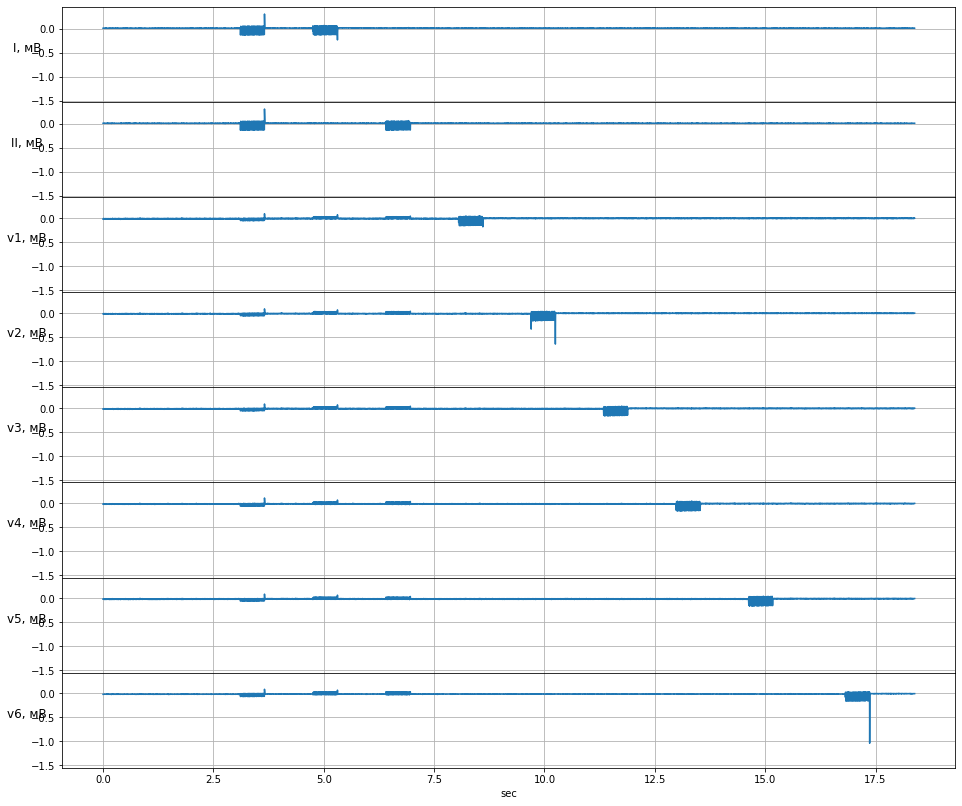

In [13]:
# Доп. ток
passed_test, values = doptok_test(testing_record, n_seg = 16)
tests_rezult_pd.loc[9] = [ 'Doptok_test', passed_test  , values, pd.NA]

Значения напряжения: [[1.955, 1.962], [1.955, 1.963], [1.957, 1.962]]
Полученные входные сопротивления: [170, 169, 219]


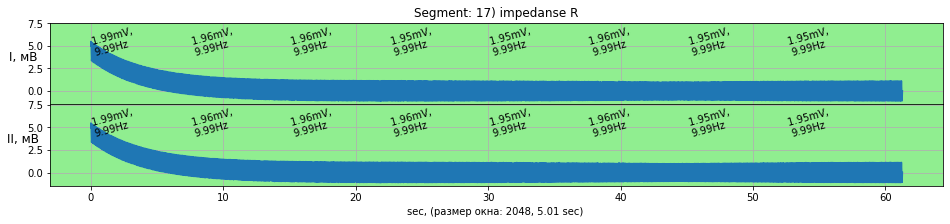

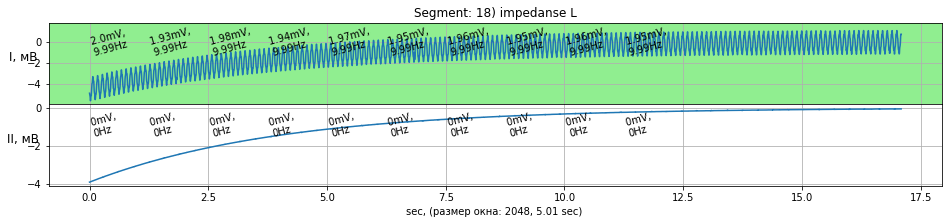

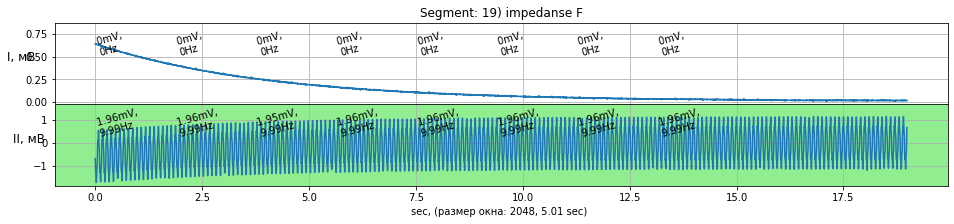

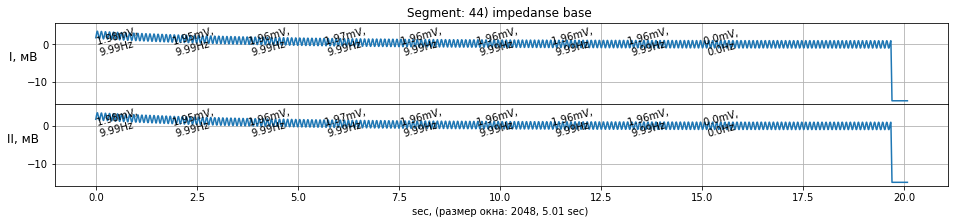

Значения напряжения: [[1.958, 1.964], [1.959, 1.964], [1.958, 1.962], [1.957, 1.963], [1.959, 1.963], [1.958, 1.963]]
Полученные входные сопротивления: [221, 239, 302, 205, 352, 267]


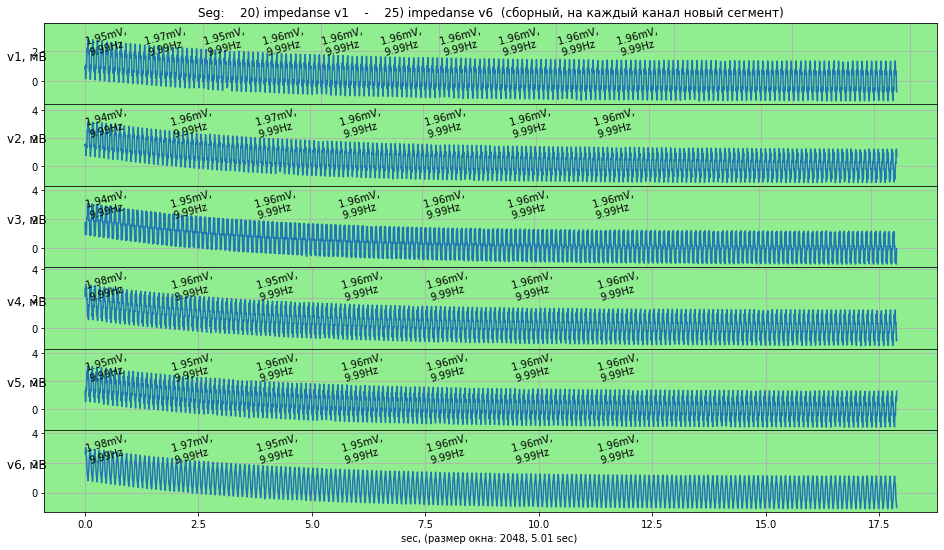

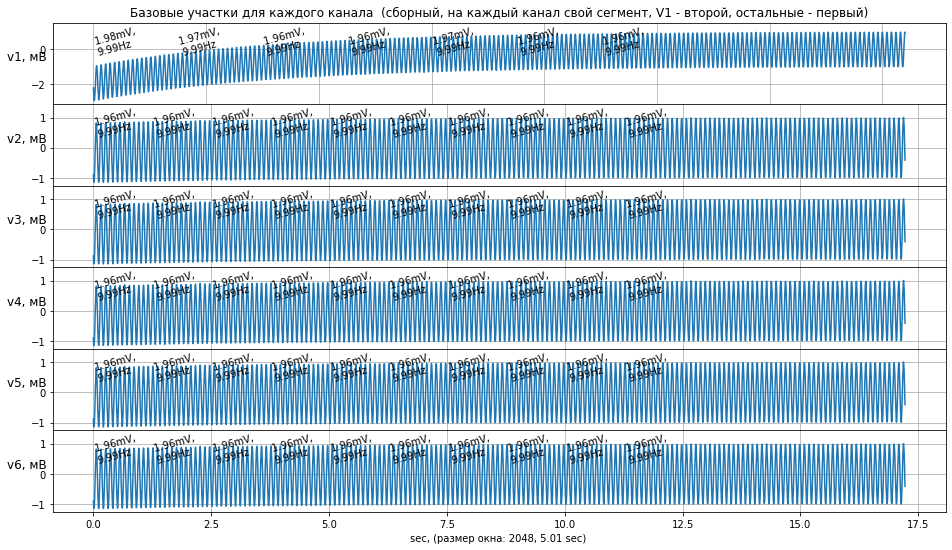

In [14]:
# Входные сопротивления
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 17, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 20, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[10] = [ 'Impedanse test', passed_test  , values, spikes]

Значения напряжения: [[1.958, 1.962], [1.96, 1.963], [1.959, 1.962]]
Полученные входные сопротивления: [310, 436, 379]


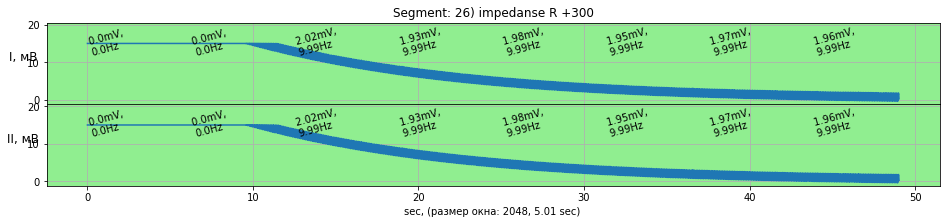

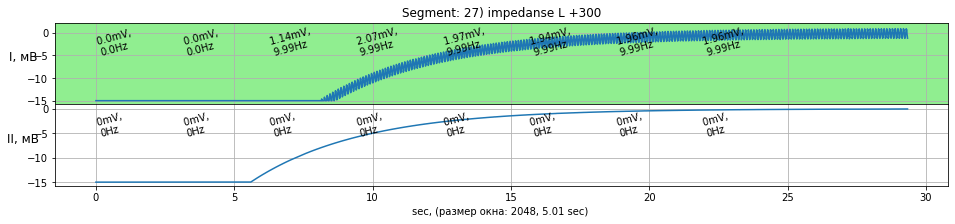

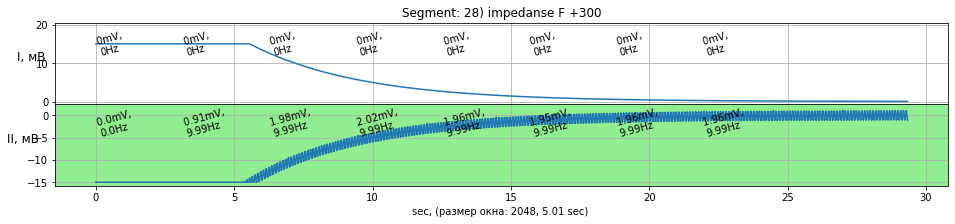

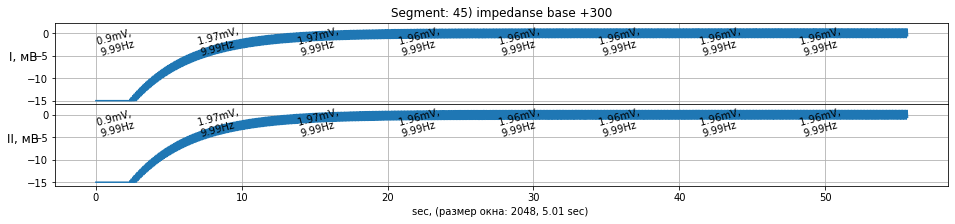

Значения напряжения: [[1.96, 1.964], [1.959, 1.964], [1.959, 1.963], [1.958, 1.963], [1.958, 1.963], [1.957, 1.963]]
Полученные входные сопротивления: [306, 263, 273, 214, 238, 204]


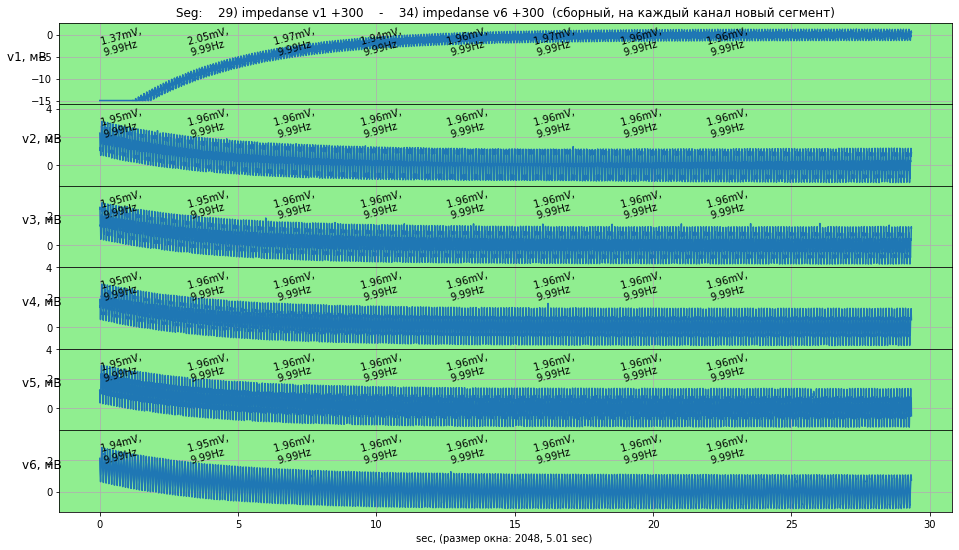

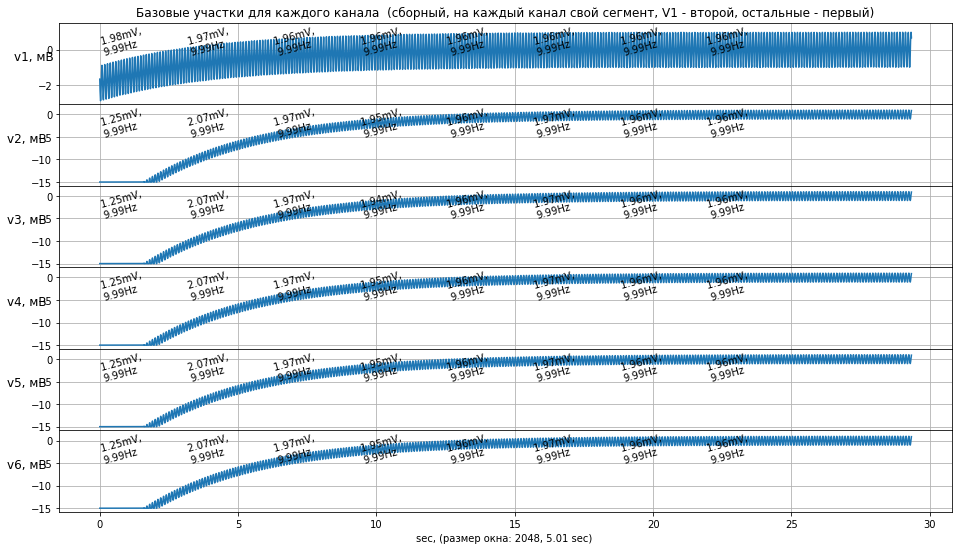

In [15]:
# Входные сопротивления +300 мВ
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 26, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 29, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[11] = [ 'Impedanse test +300 mV', passed_test  , values, spikes]

Значения напряжения: [[1.957, 1.968], [1.959, 1.968], [1.956, 1.968]]
Полученные входные сопротивления: [115, 124, 99]


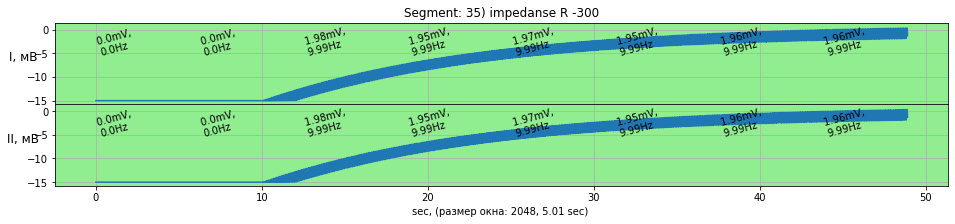

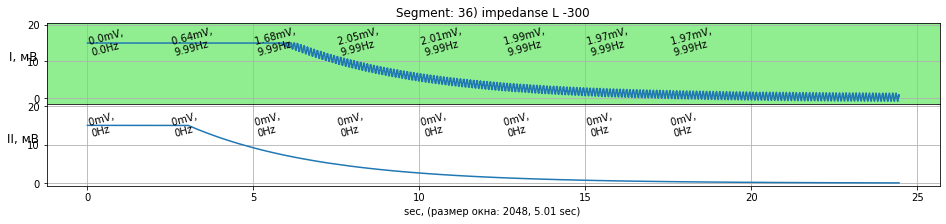

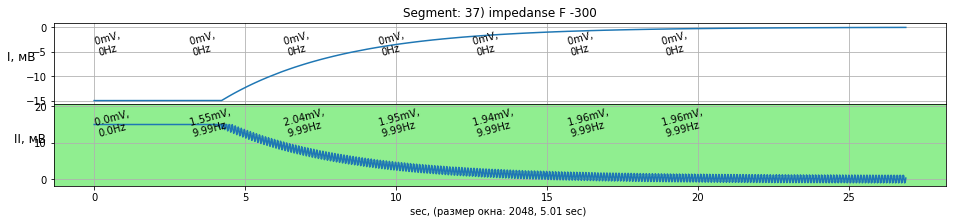

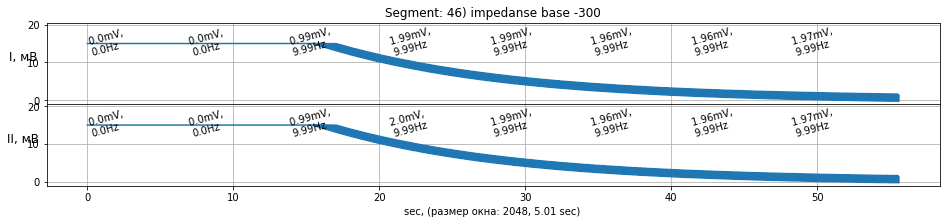

Значения напряжения: [[1.957, 1.963], [1.959, 1.963], [1.956, 1.962], [1.956, 1.962], [1.956, 1.962], [1.957, 1.963]]
Полученные входные сопротивления: [178, 278, 217, 191, 200, 229]


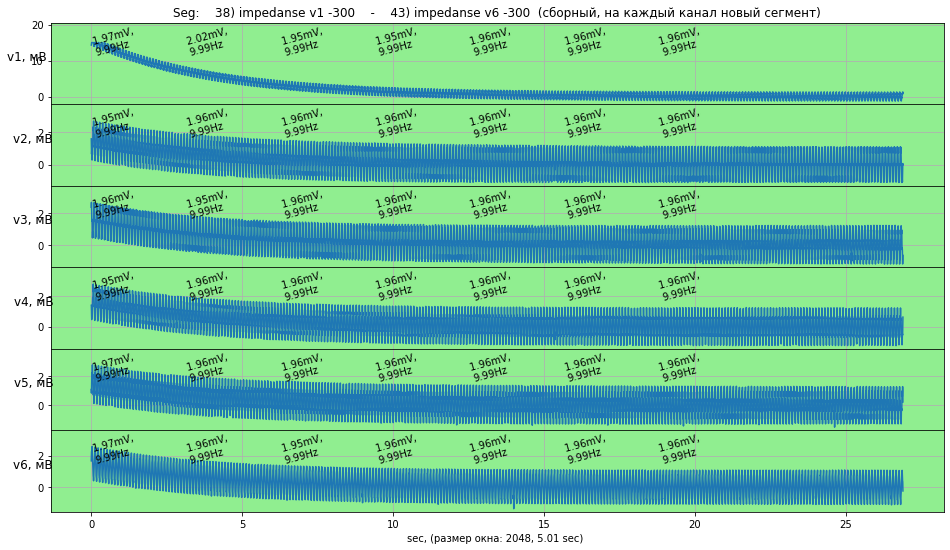

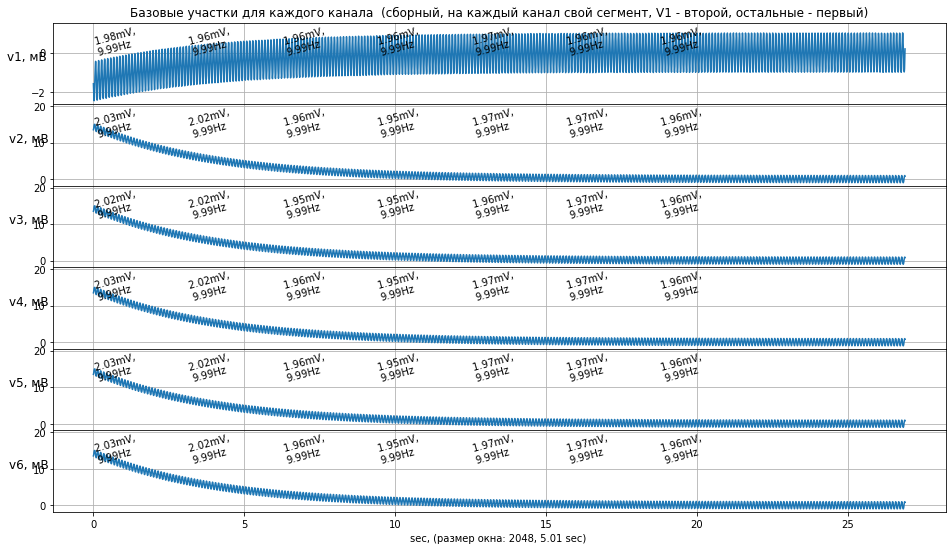

In [16]:
# Входные сопротивления -300 мВ
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 35, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 38, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[12] = [ 'Impedanse test -300 mV', passed_test  , values, spikes]

## Результаты 

In [17]:
tests_rezult_pd

Test_name Passed_test  \
0                   Nose test       False   
1              Amp test 50 uV        True   
2              Amp test 10 mV        True   
3      Amp test 10 mV +300 mV        True   
4      Amp test 10 mV -300 mV        True   
5     frequency response 5 Hz        True   
6   frequency response 50 mHz        True   
7   frequency response 100 Hz        True   
8                    ECG test        True   
9                 Doptok_test       False   
10             Impedanse test        True   
11     Impedanse test +300 mV        True   
12     Impedanse test -300 mV        True   

                                      Returned_values Spikes  
0   [0.012, 0.012, 0.021, 0.024, 0.021, 0.027, 0.0...   <NA>  
1    [0.06, 0.06, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]   <NA>  
2       [9.8, 9.8, 9.79, 9.8, 9.79, 9.79, 9.79, 9.79]  False  
3    [9.79, 9.79, 9.79, 9.79, 9.79, 9.79, 9.79, 9.79]  False  
4    [9.79, 9.79, 9.79, 9.79, 9.79, 9.79, 9.79, 9.79]  False  
5    [1.96, 1.96, 1.96, 1.96, 1.96, 1.96, 1.96, 1.96]  False  
6    [1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55]  False  
7          [1.51, 1.51, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]   <NA>  
8                                                <NA>   <NA>  
9   [[0.29, -0.25], [0.3, -0.15], [0.1, -0.18], [0...   <NA>  
10      [170, 169, 219, 221, 239, 302, 205, 352, 267]   True  
11      [310, 436, 379, 306, 263, 273, 214, 238, 204]   True  
12       [115, 124, 99, 178, 278, 217, 191, 200, 229]   True

---
Не прошли 

In [18]:
tests_rezult_pd[tests_rezult_pd['Passed_test'] == False]

Test_name Passed_test                                    Returned_values  \
0    Nose test       False  [0.012, 0.012, 0.021, 0.024, 0.021, 0.027, 0.0...   
9  Doptok_test       False  [[0.29, -0.25], [0.3, -0.15], [0.1, -0.18], [0...   

  Spikes  
0   <NA>  
9   <NA>

---
Выбросы

In [19]:
tests_rezult_pd[tests_rezult_pd['Spikes'] == True]

Test_name Passed_test  \
10          Impedanse test        True   
11  Impedanse test +300 mV        True   
12  Impedanse test -300 mV        True   

                                  Returned_values Spikes  
10  [170, 169, 219, 221, 239, 302, 205, 352, 267]   True  
11  [310, 436, 379, 306, 263, 273, 214, 238, 204]   True  
12   [115, 124, 99, 178, 278, 217, 191, 200, 229]   True

2) 10 mV std
канал: I


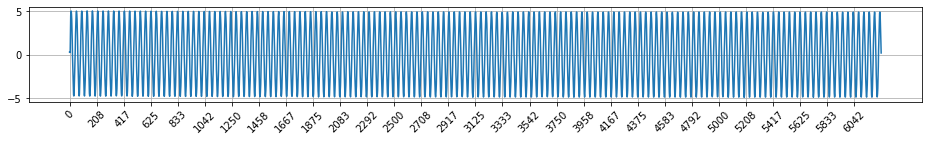

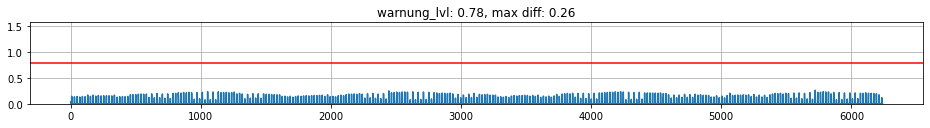

False

In [20]:
n_seg, n_ch = 2, 0

print(testing_record.time_limits[n_seg][0])
print('канал:', testing_record.channels[n_ch].name)
testing_record.channels[n_ch].data_split[n_seg].plot_signal()
testing_record.channels[n_ch].data_split[n_seg].check_spike(plot_spike=True)

In [21]:
# for i in range(len(testing_record.seg_with_spike)):    
#     n_seg, n_ch = testing_record.seg_with_spike[i]

#     print(testing_record.time_limits[n_seg][0])
#     print('канал:', testing_record.channels[n_ch].name)
#     testing_record.channels[n_ch].data_split[n_seg].plot_signal()
#     testing_record.channels[n_ch].data_split[n_seg].check_spike(plot_spike=True)
#     print('-------------------------------------------------------------------------------------------')

In [22]:
testing_record.seg_with_spike

[[17, 0],
 [17, 1],
 [18, 0],
 [19, 1],
 [20, 2],
 [21, 3],
 [22, 4],
 [23, 5],
 [24, 6],
 [25, 7],
 [26, 0],
 [26, 1],
 [27, 0],
 [28, 1],
 [29, 2],
 [30, 3],
 [31, 4],
 [32, 5],
 [33, 6],
 [34, 7],
 [35, 0],
 [35, 1],
 [36, 0],
 [37, 1],
 [38, 2],
 [39, 3],
 [40, 4],
 [41, 5],
 [42, 6],
 [43, 7]]

In [23]:
time_end = dt.today()
print(f'Время выполнения: {(time_end - time_start).seconds//60}:{(time_end - time_start).seconds%60}')
print('Время конца:     ' ,dt.today().strftime("%H:%M:%S"))

Время выполнения: 0:51
Время конца:      14:08:28
